### Exercices sur le Bagging et le Pasting :

#### Question 1 : Bagging vs. Pasting

Expliquez brièvement la différence entre le Bagging et le Pasting. Quels sont les avantages de chaque méthode et dans quel contexte pourriez-vous privilégier l'une par rapport à l'autre ?

#### Question 1 : Bagging vs. Pasting

Le Bagging et le Pasting sont des techniques d'ensemble où plusieurs modèles sont entraînés sur des sous-ensembles différents des données. La différence principale réside dans l'échantillonnage : le Bagging utilise un échantillonnage avec remplacement (bootstrap), tandis que le Pasting utilise un échantillonnage sans remplacement. Les avantages du Bagging incluent une meilleure généralisation et une réduction de la variance, tandis que le Pasting peut être moins sensible aux outliers.

#### Question 2 : Rôle de l'échantillonnage Bootstrap

Dans le contexte du Bagging, expliquez le rôle de l'échantillonnage bootstrap. En quoi cela contribue-t-il à la diversité des modèles dans l'ensemble ?

#### Question 2 : Rôle de l'échantillonnage Bootstrap

L'échantillonnage bootstrap dans le Bagging permet de créer plusieurs ensembles d'entraînement à partir d'un seul ensemble de données en tirant aléatoirement des échantillons avec remplacement. Cela introduit de la diversité dans les modèles de l'ensemble, car chaque modèle voit une version légèrement différente des données, ce qui réduit la corrélation entre les modèles et améliore la robustesse du modèle global.

#### Question 3 : Impact du Bootstrap sur la Corrélation

Comment l'échantillonnage bootstrap dans le Bagging affecte-t-il la corrélation entre les modèles de l'ensemble ? En quoi cela contribue-t-il à améliorer la performance globale ?

#### Question 3 : Impact du Bootstrap sur la Corrélation

L'échantillonnage bootstrap réduit la corrélation entre les modèles du Bagging, car chaque modèle voit un échantillon légèrement différent lors de son entraînement. Cela aide à éviter le surajustement, car les modèles sont moins susceptibles de reproduire les mêmes erreurs sur les mêmes échantillons.

#### Question 4 : Bagging avec Différents Modèles de Base

Le Bagging peut être utilisé avec différents types de modèles de base. Citez au moins deux autres modèles de base (autres que les arbres de décision) qui pourraient être utilisés avec le Bagging, et expliquez brièvement dans quels cas cela pourrait être bénéfique.

#### Question 4 : Bagging avec Différents Modèles de Base

Le Bagging n'est pas limité aux arbres de décision comme modèles de base. D'autres modèles tels que les régressions logistiques, les k-plus proches voisins (KNN) ou les machines à vecteurs de support (SVM) peuvent également être utilisés. L'utilisation de modèles de base différents peut être bénéfique lorsque ces modèles apportent des perspectives différentes sur le problème, contribuant ainsi à la diversité de l'ensemble.

#### Question 5 : Critères de Performance

Lors de l'évaluation de la performance d'un modèle Bagging ou Pasting, quels critères de performance pourriez-vous utiliser ? Expliquez pourquoi ces critères sont pertinents dans ce contexte.

#### Question 5: Critères de Performance

Les critères de performance pour évaluer un modèle Bagging peuvent inclure la précision, le rappel, la F1-score, ou toute autre mesure appropriée à la nature du problème. En général, les critères de performance devraient refléter la capacité du modèle à bien généraliser sur de nouvelles données, en évitant le surajustement.

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

### Exercice d'Implémentation :

#### Exercice : Bagging avec des Arbres de Décision

Utilisez scikit-learn pour implémenter un modèle Bagging avec des arbres de décision comme modèles de base. Suivez ces étapes :

    Chargez un ensemble de données approprié (vous pouvez utiliser une base de données intégrée à scikit-learn).
    Divisez le jeu de données en ensembles d'entraînement et de test.
    Créez un modèle Bagging avec un arbre de décision comme modèle de base.
    Ajustez le modèle sur l'ensemble d'entraînement.
    Évaluez la performance du modèle sur l'ensemble de test en utilisant un critère approprié (par exemple, précision, rappel, F1-score).

Assurez-vous de commenter votre code pour expliquer chaque étape de l'implémentation. Vous pouvez également expérimenter avec différents hyperparamètres du modèle Bagging pour observer leur impact sur la performance.

Chargez un ensemble de données approprié

In [46]:
# Charger un ensemble de données (par exemple, Iris)
data = load_iris()
X, y = data.data, data.target

Divisez le jeu de données en ensembles d'entraînement et de test.

In [47]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Créez un modèle Bagging avec un arbre de décision comme modèle de base.

In [48]:
# Créer un modèle Bagging avec un arbre de décision comme modèle de base
base_model = DecisionTreeClassifier(criterion='gini', random_state=42)
model_bagging = BaggingClassifier(base_model, n_estimators=50, random_state=42)

Ajustez le modèle sur l'ensemble d'entraînement.

In [49]:
# Ajuster le modèle sur l'ensemble d'entraînement
model_bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=50, random_state=42)

Évaluez la performance du modèle sur l'ensemble de test en utilisant un critère approprié

In [50]:
# Évaluer la performance sur l'ensemble de test
predictions = model_bagging.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with Bagging: {accuracy}")

Accuracy with Bagging: 1.0


In [51]:
# Calculer la précision
precision = precision_score(y_test, predictions, average='weighted')  # pour le multiclasse
print(f"Precision with Bagging: {precision}")


Precision with Bagging: 1.0


In [52]:
# Calculer le score F1
f1 = f1_score(y_test, predictions, average='weighted')  # pour le multiclasse
print(f"F1 Score with Bagging: {f1}")

F1 Score with Bagging: 1.0


QCM sur le Bagging, le Pasting et l'Ensemble d'Arbres de Décision :

    Quelle est la principale différence entre le Bagging et le Pasting ?
        a. La fonction de coût utilisée
        b. L'échantillonnage avec ou sans remplacement
        c. Le nombre d'estimateurs dans l'ensemble
        d. La profondeur des arbres de décision

    Réponse : b. L'échantillonnage avec ou sans remplacement

    Quel est le rôle de l'échantillonnage bootstrap dans le Bagging ?
        a. Échantillonner sans remplacement pour créer des sous-ensembles d'entraînement
        b. Introduire de la diversité entre les modèles
        c. Maximiser la corrélation entre les modèles
        d. Minimiser la variance des modèles

    Réponse : b. Introduire de la diversité entre les modèles

    Pourquoi le Bagging peut-il être plus robuste que l'utilisation d'un seul modèle de base ?
        a. Il utilise des modèles de base plus complexes
        b. Il introduit de la diversité entre les modèles
        c. Il utilise une fonction de coût différente
        d. Il ajuste davantage les modèles aux données d'entraînement

    Réponse : b. Il introduit de la diversité entre les modèles

    Quels sont les hyperparamètres communs pour ajuster un modèle Bagging avec des arbres de décision ?
        a. learning_rate et n_estimators
        b. max_depth et min_samples_split
        c. n_estimators et max_features
        d. C et kernel

    Réponse : c. n_estimators et max_features

    Quel critère est utilisé pour mesurer la pureté d'un nœud lors de la construction d'un arbre de décision dans le Bagging ?
        a. Variance
        b. Gini Index
        c. Entropie
        d. MSE (Mean Squared Error)

    Réponse : b. Gini Index

    Quel est l'objectif principal du Bagging en termes de performance du modèle ?
        a. Maximiser la variance
        b. Minimiser la diversité
        c. Minimiser la corrélation entre les modèles
        d. Minimiser la précision

    Réponse : c. Minimiser la corrélation entre les modèles

    Quelle métrique est souvent utilisée pour évaluer la performance d'un modèle Bagging sur des données de test ?
        a. Aire sous la courbe ROC (AUC-ROC)
        b. Précision (Precision)
        c. Exactitude (Accuracy)
        d. Score F1

    Réponse : c. Exactitude (Accuracy)

Mean Squared Error: 0.0013733333333333332


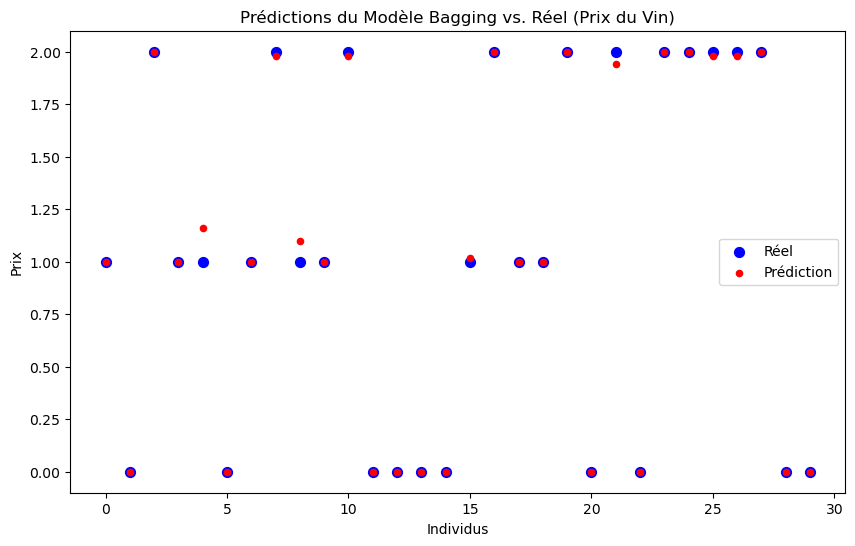

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor  # Regressor au lieu de Classifier
from sklearn.tree import DecisionTreeRegressor  # Regressor au lieu de Classifier
from sklearn.metrics import mean_squared_error

# Charger le jeu de données wine depuis un fichier CSV
data = pd.read_csv('datasets/wine.csv')
# Séparer les variables indépendantes (X) et la variable cible (y)
X = data.drop('price', axis=1)
y = data['price']

# Supprimer les lignes avec des valeurs manquantes dans la colonne 'price'
data = data.dropna(subset=['price'])

# Supprimer les lignes avec des valeurs manquantes dans la colonne 'price' pour l'ensemble d'entraînement
not_nan_indices = ~np.isnan(y_train)
X_train = X_train[not_nan_indices]
y_train = y_train[not_nan_indices]

# Créer un modèle Bagging avec un arbre de décision comme modèle de base (Regressor au lieu de Classifier)
base_model = DecisionTreeRegressor(random_state=42)
model_bagging = BaggingRegressor(base_model, n_estimators=50, random_state=42)

# Ajuster le modèle sur l'ensemble d'entraînement
model_bagging.fit(X_train, y_train)

# Évaluer la performance sur l'ensemble de test
predictions = model_bagging.predict(X_test)

# Calculer le score R2
r2 = r2_score(y_test, predictions)
print(f"R2 Score: {r2}")

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Créer un graphique pour visualiser les prédictions
plt.figure(figsize=(10, 6))

# Afficher les valeurs réelles en bleu avec des points plus grands
plt.scatter(range(len(X_test)), y_test, color='blue', label='Réel', s=50)

# Afficher les prédictions en rouge
plt.scatter(range(len(X_test)), predictions, color='red', label='Prédiction', s=20)

# Ajouter des étiquettes et une légende
plt.xlabel('Individus')
plt.ylabel('Prix')
plt.title('Prédictions du Modèle Bagging vs. Réel (Prix du Vin)')
plt.legend()

# Afficher le graphique
plt.show()